# Q1: Overview

Firstly, we will start by importing the libraries that we need and then download and read our data. 

We will download the data from the replication package of the paper(https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

The first data file that we will access is the mai_data.tab that contains data for all the analyses. We download and read it with pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_df = pd.read_csv('Data/main_data.tab',sep='\t')
main_df

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


To make sure that we have the correct data we will replicate the summary and descriptive statistics of the data on Table SI.3.1 and SI.3.2 of the Supporting Information(SI) of the paper

We will start by keeping the columns of the data described in the first table (Main analysis).

In [3]:
main_an_df = main_df.loc[:,['repression','lnrepression','dumrepression','hostcity','prox_hotelonly',
                         'prox_hotelpress','time','time2','time3','lnpop_1970',
                         'literacy_avg','vote_frejuli','lnrebact1974','lnrepression70_77','latitude',
                         'lnstrikes','lnlag_strikes','lnlag2_strikes','zone1','zone2','zone3','zone4','zone5']]
main_an_df.dropna(inplace=True)
main_an_df

,repression,lnrepression,dumrepression,hostcity,prox_hotelonly,prox_hotelpress,time,time2,time3,lnpop_1970,...,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,zone1,zone2,zone3,zone4,zone5
59,0.0,0.0,0.0,0.0,6.274075,6.274075,0.01,0.0001,9.999999e-07,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
60,0.0,0.0,0.0,0.0,6.274075,6.274075,0.02,0.0004,7.999999e-06,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
61,0.0,0.0,0.0,0.0,6.274075,6.274075,0.03,0.0009,2.700000e-05,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
62,0.0,0.0,0.0,0.0,6.274075,6.274075,0.04,0.0016,6.399999e-05,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
63,0.0,0.0,0.0,0.0,6.274075,6.274075,0.05,0.0025,1.250000e-04,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,0.0,0.0,0.0,0.0,6.802273,6.875042,1.13,1.2769,1.442897e+00,9.209440,...,0.000000,-26.347733,0.0,0.0,0.0,0,0,1,0,0
133368,0.0,0.0,0.0,0.0,6.802273,6.875042,1.14,1.2996,1.481544e+00,9.209440,...,0.000000,-26.347733,0.0,0.0,0.0,0,0,1,0,0
133369,0.0,0.0,0.0,0.0,6.802273,6.875042,1.15,1.3225,1.520875e+00,9.209440,...,0.000000,-26.347733,0.0,0.0,0.0,0,0,1,0,0
133370,0.0,0.0,0.0,0.0,6.802273,6.875042,1.16,1.3456,1.560896e+00,9.209440,...,0.000000,-26.347733,0.0,0.0,0.0,0,0,1,0,0


Then we will get the descriptive statistics for each column with the method describe().

In [4]:
table_SI31 = main_an_df.describe().loc[['count','mean','std','min','max']].round(decimals=3)
table_SI31.T

,count,mean,std,min,max
repression,56394.0,0.005,0.105,0.000,7.000
lnrepression,56394.0,0.003,0.054,0.000,2.079
dumrepression,56394.0,0.003,0.059,0.000,1.000
hostcity,56394.0,0.010,0.101,0.000,1.000
prox_hotelonly,56394.0,6.988,1.630,0.000,9.398
prox_hotelpress,56394.0,7.067,1.646,0.000,9.398
time,56394.0,0.590,0.338,0.010,1.170
time2,56394.0,0.462,0.411,0.000,1.369
time3,56394.0,0.407,0.460,0.000,1.602
lnpop_1970,56394.0,9.710,1.331,6.057,14.905


Then we will do the same for the second table that describes data from the Post World Cup period. 

In [5]:
main_pwc_df = main_df.loc[:,['repression','lnrepression','hostcity','postwc_time3mdum',
                         'time_postwc','time2_postwc','time3_postwc','lnpop_1970',
                         'literacy_avg','vote_frejuli','lnrebact1974','lnrepression70_77',
                         'zone1','zone2','zone3','zone4','zone5']]
main_pwc_df.dropna(inplace=True)
main_pwc_df
table_SI32 = main_pwc_df.describe().loc[['count','mean','std','min','max']].round(decimals=3)
table_SI32.T

,count,mean,std,min,max
repression,56394.0,0.004,0.096,0.000,9.000
lnrepression,56394.0,0.002,0.047,0.000,2.303
hostcity,56394.0,0.010,0.101,0.000,1.000
postwc_time3mdum,56394.0,0.786,0.410,0.000,1.000
time_postwc,56394.0,0.590,0.338,0.010,1.170
time2_postwc,56394.0,0.462,0.411,0.000,1.369
time3_postwc,56394.0,0.407,0.460,0.000,1.602
lnpop_1970,56394.0,9.710,1.331,6.057,14.905
literacy_avg,56394.0,0.717,0.110,0.316,0.901
vote_frejuli,56394.0,58.618,11.499,28.500,94.300


As we can see, in both cases the descriptive statistics of the data that we have are almost identical to the tables seen at the Supporting Information Tables.

That way we can be certain that we are using the correct data.

## Figure 1

Next we will replicate Figure 1 of the paper.

The authors of the paper provide the data needed for the replication of this figure on the Replication package of the paper.

We will download and read figure_1_data.tab from this package with pandas.

In [6]:
figure1_df = pd.read_csv('Data/figure_1_data.tab',sep='\t')
figure1_df

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


On this figure we will create a line plot that has 5-year time spans after the World cup as x-axis points and the percentage of autocratic regimes hosting sporting event on each period for the y-axis. 

On the column 'postcwy' we can see the index number for each one of this 7 time periods.
Also on the column 'autochostperc' we can see the percentages that we need for the y-axis.

Thats all the data we need for the first figure.
We will use seaborn.lineplot and matplotlib.pyplot for the creation of our Figure.

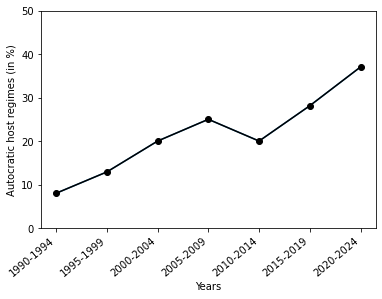

In [7]:
labels = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
ax = sns.lineplot(data = figure1_df,x='postcwy',y='autochostperc')
majors = [1,2,3,4,5,6,7]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
ax.set_xticklabels(labels, rotation=40, ha="right")
plt.plot(figure1_df['postcwy'],figure1_df['autochostperc'],marker="o",color="black")
plt.ylim(0,50)
plt.ylabel('Autocratic host regimes (in %)')
plt.xlabel('Years')
plt.show()

## Figure SI.1.1

We will replicate the Figure SI.1.1 of the supporting information of the paper.

Again, the authors provide us with the data for the replication of this figure on the Replication package website.

We will download and read with pandas the figure_SI11_data.tab data file.

In [8]:
figureSI11_df = pd.read_csv('Data/figure_SI11_data.tab',sep='\t')
figureSI11_df.drop_duplicates(inplace=True,ignore_index=True)
figureSI11_df

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1991.0,0.0,2.5,3.0,NaN
2,1995.0,1.0,2.5,NaN,2.0
3,1999.0,0.0,2.5,3.0,NaN
4,2003.0,0.0,2.5,3.0,NaN
...,...,...,...,...,...
307,2006.0,0.0,27.5,28.0,NaN
308,2010.0,0.0,27.5,28.0,NaN
309,2014.0,0.0,27.5,28.0,NaN
310,2018.0,0.0,27.5,28.0,NaN


To replicate this figure we need to get data on the regime (democratic or autocratic) of the host country, hosting different sporting events through the years.

On each row of the dataframe we can see each of these events' year and regime.
What we don't get is which actual events these rows belong to.

If we look at the data more carefully we can see (figure below) that on the column year the values begin from low years such as the 50s, 60s or 70s until they ascend to 2020s and then they drop again. That happens repeatedly.

<AxesSubplot:ylabel='year'>

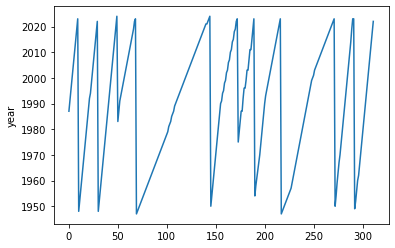

In [9]:
sns.lineplot(data=figureSI11_df,x=figureSI11_df.index,y='year')

We can assume that each of the ascending parts of the line describes the event history of each sporting area.
Then the line descends and the next sports description begins.

Now we have to pass these attributes to our data.
Firstly, we are going to find the indexes of the peak points (One event ends, the other begins)
We will use argrelextrema from scipy.signals library to do that.

Peak point indexes [9, 29, 49, 68, 144, 172, 189, 216, 271, 291, 311]


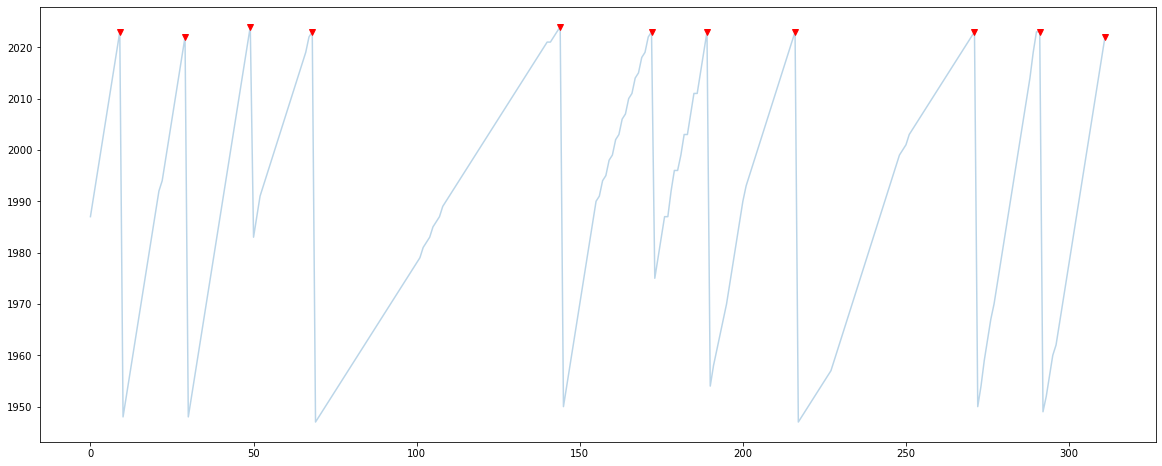

In [10]:
from scipy.signal import argrelextrema
ilocs_max = argrelextrema(figureSI11_df.year.values, np.greater_equal, order=2)[0]
ilocs_max=ilocs_max.tolist()
ilocs_max.remove(290)
figureSI11_df.year.plot(figsize=(20,8), alpha=.3)
figureSI11_df.iloc[ilocs_max].year.plot(style='.', lw=10, color='red', marker="v");
print('Peak point indexes',ilocs_max)

Now we have to apply an event column to our dataframe that describes on which event each year belongs to.

In [11]:
events = {0:'Rugby World Cup',1:'Winter Olympic Games',2:'Summer Olympic Games',3:'World Athletics Championships',4:'Ice Hockey World Championships',5:'FIFA World Cup',
          6:'Cricket World Cup',7:'World Handball Championship',8:'World Table Tennis Championships',9:'Basketball World Cup',10:'Volleyball World Championship'}
figureSI11_df['event'] = ''
j=0
s=0
for i in ilocs_max:
    figureSI11_df.loc[s:(i+1),['event']] = events[j]
    j+=1
    s = i+1
figureSI11_df

,year,regime,baseline,democ,autoc,event
0,1987.0,0.0,2.5,3.0,NaN,Rugby World Cup
1,1991.0,0.0,2.5,3.0,NaN,Rugby World Cup
2,1995.0,1.0,2.5,NaN,2.0,Rugby World Cup
3,1999.0,0.0,2.5,3.0,NaN,Rugby World Cup
4,2003.0,0.0,2.5,3.0,NaN,Rugby World Cup
...,...,...,...,...,...,...
307,2006.0,0.0,27.5,28.0,NaN,Volleyball World Championship
308,2010.0,0.0,27.5,28.0,NaN,Volleyball World Championship
309,2014.0,0.0,27.5,28.0,NaN,Volleyball World Championship
310,2018.0,0.0,27.5,28.0,NaN,Volleyball World Championship


In [12]:
figureSI11_df['event'].value_counts()

Ice Hockey World Championships      76
World Table Tennis Championships    55
FIFA World Cup                      28
World Handball Championship         27
Winter Olympic Games                20
Summer Olympic Games                20
Basketball World Cup                20
Volleyball World Championship       20
World Athletics Championships       19
Cricket World Cup                   17
Rugby World Cup                     10
Name: event, dtype: int64

As we can see above we can verify that the number of events for each sport matches the original Figure.

To be able to plot we need to make some changes to our dataframe.


We will only keep the year, regime and event columns.

On the regime column, autocratic host regimes have the value 0 and democratic 1. We will change that to 1 for autocratic and -1 for democratic.

Finally we will add a REG column that has 'A' values for autocratic regimes and 'D' for democratic. We will use this column for the coloring of the spikes.

In [13]:
figureSI11_df = figureSI11_df.loc[:,['year','regime','event']]
figureSI11_df['regime'].replace(to_replace = 1, value = -1, inplace=True)
figureSI11_df['regime'].replace(to_replace = 0, value = 1, inplace=True)
def categorise(row):  
    if row['regime'] == -1:
        return 'D'
    else:
        return 'A'
figureSI11_df['REG'] = figureSI11_df.apply(lambda row: categorise(row), axis=1)
figureSI11_df

,year,regime,event,REG
0,1987.0,1.0,Rugby World Cup,A
1,1991.0,1.0,Rugby World Cup,A
2,1995.0,-1.0,Rugby World Cup,D
3,1999.0,1.0,Rugby World Cup,A
4,2003.0,1.0,Rugby World Cup,A
...,...,...,...,...
307,2006.0,1.0,Volleyball World Championship,A
308,2010.0,1.0,Volleyball World Championship,A
309,2014.0,1.0,Volleyball World Championship,A
310,2018.0,1.0,Volleyball World Championship,A


Now we are ready to plot.

We will use plotnines ggplot and geom_bar() to create our plot. We will also use facet_grid() to make one facet for each unique value of the event column (For each sporting event).

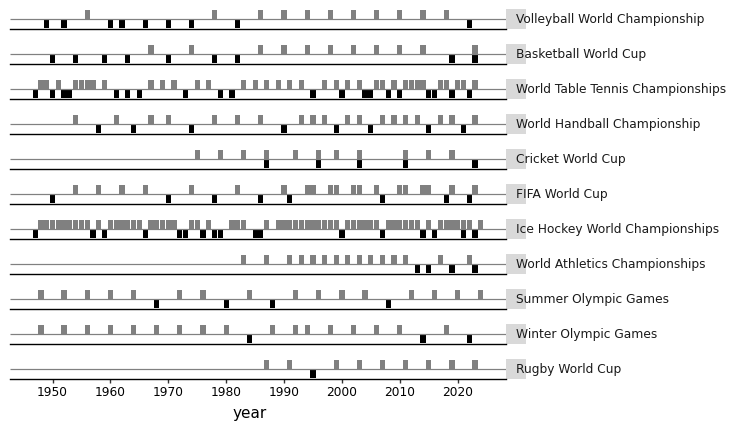

<ggplot: (122276338622)>

In [14]:
event_list = ['Volleyball World Championship','Basketball World Cup','World Table Tennis Championships','World Handball Championship','Cricket World Cup','FIFA World Cup','Ice Hockey World Championships','World Athletics Championships','Summer Olympic Games','Winter Olympic Games','Rugby World Cup']
events_cat = pd.Categorical(figureSI11_df['event'], categories=event_list)
figureSI11_df = figureSI11_df.assign(events_cat = events_cat)
colors = {1:'black', -1:'grey'}
figureSI11_df['event'] = figureSI11_df['event'].astype('category')
(ggplot(figureSI11_df, aes(x='year', weight='regime',fill = 'REG'))
    + geom_bar()
    + geom_hline(yintercept = 0,color = 'grey')
    + scale_fill_manual(values=['grey','black'],guide = False)
    + facet_grid('events_cat ~ .')
    + theme(panel_spacing=0.15,axis_text_x=element_text(color='black'),
            axis_line_x=element_line(color='black'),axis_ticks_major_y=element_blank(),
            panel_background=element_rect(fill='white'),axis_text_y=element_blank(),
            axis_title_y=element_blank(),strip_text_y = element_text(angle = 0,ha = 'left'))
    + scale_x_continuous(breaks=[1950,1960,1970,1980,1990,2000,2010,2020])
    + labs(x='year'))

# Q2: Repression in Departments with and without Host Cities

To validate the 2 hypotheses made by the authors of the paper we will run the first three models found on Table 1 of the main paper.

For the models we will use OLS (Ordinary Least Squares) to predict the repression depending on many independent variables.

First, we will use the main dataframe from Q1.

In [15]:
main_df

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


## Model 1

For the first model we will use 'lnrepression' as the dependent variable.

The independent varables will be: hostcity x time, hostcity x time2, hostcity, time and time2.

The library for the OLS analysis used will be statsmodels.formula.api.

Our model must be a robust OLS so we will apply a cov_type = 'HC0' attribute which does this job for us.

In [16]:
import statsmodels.formula.api as smf
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2'
repression_mod1 = smf.ols("lnrepression ~ " + independent_variables, data=main_df)
repression_mod1 = repression_mod1.fit(cov_type='HC0')
repression_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.31e-13
Time:                        14:53:56   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0026      0.001      4.027      0.000       0.001       0.004
hostcity           0.0202      0.034      0.591      0.554      -0.047       0.087
time              -0.0028      0.002     -1.233      0.217      -0.007       0.002
hostcity:time      0.4012      0.144      2.780      0.005       0.118       0.684
time2              0.0020      0.002      1.132      0.258      -0.001       0.006
hostcity:time2    -0.3230      0.110     -2.923      0.003      -0.540      -0.106
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## Model 2

For the second model we will work the same way, but we will ad these variables to our independent variable list:
lnpop_1970 (Population Size), vote_frejuli (Peronist vote share), literacy_avg (Literacy Rate), lnrebact1974 (Rebel Activity) and lnrepression70_77 (Past Repression).

In [17]:
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77'
repression_mod2 = smf.ols("lnrepression ~ " + independent_variables, data=main_df)
repression_mod2 = repression_mod2.fit(cov_type='HC0')
repression_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.12e-32
Time:                        14:53:56   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0041      0.002     -2.056      0.040      -0.008      -0.000
hostcity             -0.0037      0.034     -0.109      0.913      -0.070       0.063
time                 -0.0030      0.002     -1.297      0.195      -0.008       0.002
hostcity:time         0.4014      0.143      2.801      0.005       0.121       0.682
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
hostcity:time2       -0.3231      0.110     -2.945      0.003      -0.538      -0.108
lnpop_1970            0.0010      0.000      4.623      0.000       0.001       0.001
vote_frejuli       -3.22e-05   1.86e-05     -1.727      0.084   -6.87e-05    4.34e-06
literacy_avg         -0.0056      0.001     -5.192      0.000      -0.008      -0.003
lnrebact1974         -0.0001      0.000     -0.939      0.348      -0.000       0.000
lnrepression70_77     0.0041      0.000     10.817      0.000       0.003       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693274.776
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 3

The 3rd model uses the same analysis and variables with the difference of zone fixed effects.

To apply those effects to our model we will add zone 2-5 variable to our independent variables list.

In [18]:
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5'
repression_mod3 = smf.ols("lnrepression ~ " + independent_variables, data=main_df)
repression_mod3 = repression_mod3.fit(cov_type='HC0')
repression_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.63e-31
Time:                        14:53:56   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0039      0.002     -1.660      0.097      -0.009       0.001
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
hostcity:time         0.4014      0.142      2.825      0.005       0.123       0.680
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
hostcity:time2       -0.3231      0.109     -2.969      0.003      -0.536      -0.110
lnpop_1970            0.0033      0.000      7.885      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.287      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.268      0.000       0.002       0.004
zone2                -0.0147      0.002     -9.507      0.000      -0.018      -0.012
zone3                -0.0117      0.001     -9.014      0.000      -0.014      -0.009
zone4                -0.0082      0.004     -2.172      0.030      -0.016      -0.001
zone5                -0.0092      0.001     -9.209      0.000      -0.011      -0.007
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.905
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we have all 3 models we are ready to replicate Table 1 of the paper.

To do that we will use the library stargazer.stargazer.

In [19]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_tab = Stargazer([repression_mod1, repression_mod2,repression_mod3])
stargazer_tab.title('TABLE 1. Repression in Departments with and without Host Cities')
stargazer_tab.covariate_order(['hostcity:time','hostcity:time2','hostcity','time','time2','lnpop_1970','literacy_avg','vote_frejuli',
                                'lnrebact1974','lnrepression70_77','Intercept'])
stargazer_tab.rename_covariates({'Intercept': 'Constant', 'hostcity': 'Host City','hostcity:time':'Host City × Time',
                                'hostcity:time2':'Host City × Time$^2$','literacy_avg':'Literacy Rate','lnpop_1970':'Population Size',
                                'lnrebact1974':'Rebel Activity','lnrepression70_77':'Past Repression','time':'Time','time2':'Time$^2$',
                                'vote_frejuli':'Peronist vote share'})
stargazer_tab.add_line('Zone Fixed Effects', ['No', 'No','Yes'],LineLocation.FOOTER_TOP)
stargazer_tab.add_line('Clustered Standard errors', ['No', 'No','No'],LineLocation.FOOTER_TOP)
stargazer_tab.significance_levels([ 0.05, 0.01, 0.001])
stargazer_tab

As we can see above the table has 3 columns, one for each model.

Each row of the first part of the table describes an independent variable.

The cells describe the coefficient (top value) and robust standard error (parenthesis) of each variable for every model.

On the bottom rows we can see if there where any zone fixed effects in each model (Yes on model 3) and if the standard errors where clustered. Also we can see the observations and the R$^2$ of the model.

The asteriscs seen on the cell values show the size p-value as it's described on the bottom note.

## Interpretation of the results

### H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

On all of the three models we can see that the variable Host City × Time has an equal positive coefficient of 0.401. This variable describes how the repression spiked on the host cities of the tournaments (hostcity variable) on the run-up of the World Cup (time variable). What that indicates is that in the run-up of the tournament, host cities met with a spike on repression events while other cities remained stable on these effects. The positive coefficient of this interaction (host city on the run-up of the tournament) is also statistically significant, with a p-value less than 0.01 . We can also see that other control variables play no significant role to the rise or reduction of the repression events.

Those results validate the first hypothesis of the authors, that in the run-up to the World Cup, state repression spikes in host cities, but not in other cities.

### H2: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities.

On contrast to the positive spike seen on the coefficient of the interaction of Host City and Time right before the World cup, we see a negative spike on the interaction of Host City variables and Time during the World Cup. As we can see the coefficient of the variable Host City × Time 2 is -0.323 equal on all 3 models. What that indicates is that in host cities at the time during the world cup (time2) there was a significant reduction of repression events. We can also see that this coefficient is statistically significant with a p-value of less than 0.01 . We can also see that other control variables play no significant role to the rise or reduction of the repression events.

Those results validate the second hypothesis of the authors, that during an international sports tournament, state repression drops in host cities but remains unchanged in other cities.

Finally, the results indicate that other control variables such as Literacy rates, Past repression etc and zone fixed effects added on models (2) and (3) had no major inpact on repression events or on the R$^2$ of the models

# Q3: Graphical Overview of Effects 

To replicate Figure 5 of the main paper, we are going to use the main dataframe from the first question (Q1) and predict the daily repression events on host and not host cities based on Model 3 of the second question (Q2)

In [20]:
main_df = pd.read_csv('Data/main_data.tab',sep='\t')
main_df

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


In [21]:
main_df = main_df.loc[:,['lnrepression','hostcity','time','time2','lnpop_1970','vote_frejuli',
                         'literacy_avg','lnrebact1974','lnrepression70_77','zone2','zone3','zone4','zone5']]
main_df

,lnrepression,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
0,0.0,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
1,0.0,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
2,0.0,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
3,0.0,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
4,0.0,0.0,NaN,NaN,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133728,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133729,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133730,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


We will add a predictions attribute to the dataframe that will include the predicted values that our model generated for each row

In [22]:
main_df['predictions'] = repression_mod3.fittedvalues

We will also get the confidence intervals for each row using the get_prediction() method on our results.

In [23]:
predicted = repression_mod3.get_prediction(main_df).summary_frame(alpha=0.05)
predicted

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.002368,0.000941,-0.004212,-0.000524,-0.103891,0.099155
1,-0.002398,0.000926,-0.004213,-0.000582,-0.103920,0.099125
2,-0.002427,0.000912,-0.004215,-0.000639,-0.103949,0.099095
3,-0.002456,0.000899,-0.004218,-0.000694,-0.103978,0.099066
4,-0.002485,0.000886,-0.004221,-0.000748,-0.104006,0.099037
...,...,...,...,...,...,...
56389,-0.006341,0.000925,-0.008154,-0.004528,-0.107864,0.095181
56390,-0.006322,0.000934,-0.008152,-0.004493,-0.107845,0.095200
56391,-0.006303,0.000942,-0.008150,-0.004456,-0.107826,0.095220
56392,-0.006284,0.000952,-0.008149,-0.004418,-0.107807,0.095240


Now, we will only keep the rows of the dataframe that have a time and prediction value and add the confidence intervals as attribute columns.

In [24]:
main_df = main_df.dropna(subset=['time','predictions'])
main_df.reset_index(drop=True, inplace=True)
main_df['mean_ci_lower'] = predicted['mean_ci_lower']
main_df['mean_ci_upper'] = predicted['mean_ci_upper']
main_df

,lnrepression,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,predictions,mean_ci_lower,mean_ci_upper
0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002368,-0.004212,-0.000524
1,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002398,-0.004213,-0.000582
2,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002427,-0.004215,-0.000639
3,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002456,-0.004218,-0.000694
4,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002485,-0.004221,-0.000748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56389,0.0,0.0,1.13,1.2769,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006341,-0.008154,-0.004528
56390,0.0,0.0,1.14,1.2996,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006322,-0.008152,-0.004493
56391,0.0,0.0,1.15,1.3225,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006303,-0.008150,-0.004456
56392,0.0,0.0,1.16,1.3456,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006284,-0.008149,-0.004418


For our plot, we need to separate the dataframe to host and non host cities. We will create 2 new separate dataframes for these 2 categories.

In [25]:
main_df_hosts = main_df[main_df['hostcity']==1]
main_df_not_hosts = main_df[main_df['hostcity']==0]

Now, we will get the mean predictions and confidence intervals for each day (time) from both of these dataframes.

In [26]:
main_df_hosts = main_df_hosts.loc[:,['lnrepression','predictions','mean_ci_lower','mean_ci_upper','time']]
main_df_hosts=main_df_hosts.groupby(['time']).mean()
main_df_hosts

,lnrepression,predictions,mean_ci_lower,mean_ci_upper
time,,,,
0.01,0.138629,0.026707,-0.036627,0.090041
0.02,0.138629,0.030595,-0.030418,0.091608
0.03,0.138629,0.034419,-0.024339,0.093176
0.04,0.138629,0.038178,-0.018392,0.094748
0.05,0.138629,0.041873,-0.012579,0.096325
...,...,...,...,...
1.13,0.000000,0.063141,0.022268,0.104015
1.14,0.000000,0.059840,0.017708,0.101972
1.15,0.000000,0.056474,0.012990,0.099958


In [27]:
main_df_not_hosts = main_df_not_hosts.loc[:,['lnrepression','predictions','mean_ci_lower','mean_ci_upper','time']]
main_df_not_hosts = main_df_not_hosts.groupby(['time']).mean()
main_df_not_hosts

,lnrepression,predictions,mean_ci_lower,mean_ci_upper
time,,,,
0.01,0.007513,0.002634,0.000771,0.004498
0.02,0.002906,0.002605,0.000771,0.004438
0.03,0.002906,0.002575,0.000770,0.004380
0.04,0.001453,0.002546,0.000769,0.004324
0.05,0.000000,0.002518,0.000767,0.004269
...,...,...,...,...
1.13,0.000000,0.001992,0.000374,0.003611
1.14,0.001453,0.002011,0.000374,0.003648
1.15,0.002303,0.002030,0.000374,0.003686


And now we are ready to plot the results with seaborn and pyplot.

On the x-axis we will have the time attribute translated to days.

On the y-axis we will have the mean value of lnrepression.

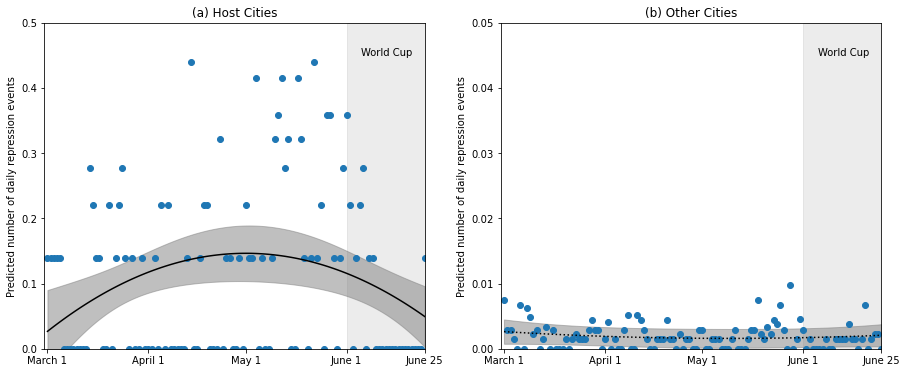

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(x='time',y=('predictions'),data=main_df_hosts,color='black',ax=ax1)
sns.lineplot(x='time',y='predictions',data=main_df_not_hosts,color='black',linestyle="dotted",ax=ax2)
ax1.set_ylim([0, 0.5])
ax2.set_ylim([0, 0.05])
ax1.set_xlim([0, 1.17])
ax2.set_xlim([0, 1.17])
ax1.set_xticks([0.01,0.32,0.62,0.93,1.17])
ax1.set_xticklabels(['March 1','April 1','May 1','June 1','June 25'])
ax2.set_xticks([0.01,0.32,0.62,0.93,1.17])
ax2.set_xticklabels(['March 1','April 1','May 1','June 1','June 25'])
ax1.set_ylabel('Predicted number of daily repression events')
ax2.set_ylabel('Predicted number of daily repression events')
ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax1.set_title('(a) Host Cities')
ax2.set_title('(b) Other Cities')
ax1.axvspan(0.93,1.17,color='grey',alpha=0.15)
ax2.axvspan(0.93,1.17,color='grey',alpha=0.15)
ax1.fill_between(main_df_hosts.index,main_df_hosts['mean_ci_lower'],main_df_hosts['mean_ci_upper'],color='grey',alpha=0.5)
ax2.fill_between(main_df_not_hosts.index,main_df_not_hosts['mean_ci_lower'],main_df_not_hosts['mean_ci_upper'],color='grey',alpha=0.5)
ax1.text(0.975,0.45,'World Cup')
ax2.text(0.975,0.045,'World Cup')
ax1.scatter(main_df_hosts.index,main_df_hosts['lnrepression'])
ax2.scatter(main_df_not_hosts.index,main_df_not_hosts['lnrepression'])
plt.show()

As we can see, the result is two separate plots, a and b, for host and non host cities respectively.

The continuous and dotted lines on the first and second plots describe the predictions of Model 3 for the mean number of daily repression events.

The shadowed space around the lines depicts the confidence intervals of our predictions.

The scattered dots on both plots show the real mean daily repression events observed at the data of the replication package.

The shadowed part on the right of both plots depicts the World Cup period.

## Interpretation

Both of these Figures once more validate the authors' Hypotheses.

On the first plot, we can clearly see that our model predicts that the daily repression events rise the period before the World Cup and decrease on the period of the event. That can be verified by the scatter points of the real observations that show a spike of events right before the event and an immediate drop as the event begins.

That of course happens only in the host cities.

On the second plot we can see that the predictions and actual observations of daily repression events on non-host cities stay almost the same at the time before and during the World Cup Event.

The results agree with the hypothesis that the Argentinian autocratic regime performed repressive acts right before the world cup on host cities of the event and stopped at the duration of it.

# Q4: Robustness Check Using a Dichotomous Indicator of Repression

To replicate TableSI.4.5. of the Supporting information of the paper, we will create 6 different models of regression

The variable we will try to predict will be dumrepression (Dichotomous Indicator of Repression)

We will create models with or without control variables and zone effects both using logistic and OLS regression models.

In [29]:
main_df = pd.read_csv('Data/main_data.tab',sep='\t')
main_df

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


## Model 1: Logistic regression with no control variables and zone effects

We will use the statsmodels.formula.api logit to create the logistic regression model.

In [30]:
from statsmodels.formula.api import logit
model1_mod = logit("dumrepression ~ hostcity*time + hostcity*time2 + hostcity + time + time2", data=main_df)
model1_res = model1_mod.fit(cov_type='HC0')
model1_res.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        14:54:00   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  HC0   LLR p-value:                 4.467e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcity           3.1376      0.576      5.448      0.000       2.009       4.266
time              -0.8733      1.067     -0.818      0.413      -2.966       1.219
hostcity:time      4.1403      2.081      1.990      0.047       0.062       8.219
time2              0.5355      0.864      0.620      0.535      -1.157       2.228
hostcity:time2    -3.2143      1.600     -2.009      0.045      -6.350      -0.078
==================================================================================
"""

## Model 2: Logistic regression with control variables and no zone effects

We will add control variables (peronist vote share, past repression...etc) to our independent variables list.

In [31]:
model2_mod = logit("dumrepression ~ hostcity*time + hostcity*time2 + hostcity + time + time2" + 
                   " + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", data=main_df)
model2_res = model2_mod.fit(cov_type='HC0')
model2_res.summary()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4027
Time:                        14:56:03   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC0   LLR p-value:                1.601e-219
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcity             -1.6274      0.628     -2.591      0.010      -2.859      -0.396
time                 -0.9927      1.088     -0.912      0.362      -3.126       1.140
hostcity:time         4.8685      2.119      2.297      0.022       0.715       9.023
time2                 0.6181      0.882      0.701      0.484      -1.111       2.347
hostcity:time2       -3.7977      1.647     -2.305      0.021      -7.026      -0.569
lnpop_1970            0.8683      0.224      3.875      0.000       0.429       1.308
vote_frejuli          0.0061      0.014      0.450      0.653      -0.020       0.033
literacy_avg         -0.2055      3.172     -0.065      0.948      -6.422       6.011
lnrebact1974          0.0486      0.078      0.626      0.531      -0.104       0.201
lnrepression70_77     0.5776      0.141      4.100      0.000       0.301       0.854
=====================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Model 3: Logistic regression with control variables and zone effects

We will add zone2 - zone5 variables to our independent variables list (Zone Effects).

In [32]:
model3_mod = logit("dumrepression ~ hostcity*time + hostcity*time2 + hostcity + time + time2" + 
                   " + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77" +
                   " + zone2 + zone3 + zone4 + zone5", data=main_df)
model3_res = model3_mod.fit(cov_type='HC0')
model3_res.summary()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4138
Time:                        14:57:15   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC0   LLR p-value:                9.017e-222
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.4018      3.161     -4.873      0.000     -21.597      -9.207
hostcity             -1.3273      0.690     -1.924      0.054      -2.679       0.025
time                 -0.9924      1.086     -0.914      0.361      -3.121       1.136
hostcity:time         5.3781      2.267      2.373      0.018       0.935       9.821
time2                 0.6179      0.880      0.702      0.483      -1.107       2.343
hostcity:time2       -4.2173      1.774     -2.378      0.017      -7.694      -0.741
lnpop_1970            0.7459      0.215      3.470      0.001       0.325       1.167
vote_frejuli          0.0200      0.015      1.323      0.186      -0.010       0.050
literacy_avg         -0.1268      3.041     -0.042      0.967      -6.088       5.834
lnrebact1974         -0.1315      0.080     -1.635      0.102      -0.289       0.026
lnrepression70_77     0.5452      0.155      3.519      0.000       0.242       0.849
zone2                -1.9991      0.450     -4.445      0.000      -2.881      -1.118
zone3                -0.9832      0.272     -3.610      0.000      -1.517      -0.449
zone4                -0.1626      0.260     -0.625      0.532      -0.673       0.347
zone5                -0.7864      0.485     -1.623      0.105      -1.736       0.163
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Models 4-6

Now we will use the same variables from the first 3 models to create results with OLS regression

Firstly, without control variables or zone effects.

In [33]:
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2'
model4_mod = smf.ols("dumrepression ~ " + independent_variables, data=main_df)
model4_res = model4_mod.fit(cov_type='HC0')
model4_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     15.66
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.94e-15
Time:                        14:58:36   Log-Likelihood:                 84143.
No. Observations:               58107   AIC:                        -1.683e+05
Df Residuals:                   58101   BIC:                        -1.682e+05
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0028      0.001      4.137      0.000       0.001       0.004
hostcity           0.0505      0.041      1.247      0.213      -0.029       0.130
time              -0.0021      0.003     -0.808      0.419      -0.007       0.003
hostcity:time      0.3184      0.158      2.017      0.044       0.009       0.628
time2              0.0013      0.002      0.637      0.524      -0.003       0.005
hostcity:time2    -0.2616      0.121     -2.160      0.031      -0.499      -0.024
==============================================================================
Omnibus:                   114009.579   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181595523.133
Skew:                          16.100   Prob(JB):                         0.00
Kurtosis:                     274.970   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Adding control variables for model 5.

In [34]:
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2' + " + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77"
model5_mod = smf.ols("dumrepression ~ " + independent_variables, data=main_df)
model5_res = model5_mod.fit(cov_type='HC0')
model5_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     19.78
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.46e-37
Time:                        14:58:45   Log-Likelihood:                 81421.
No. Observations:               56394   AIC:                        -1.628e+05
Df Residuals:                   56383   BIC:                        -1.627e+05
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0053      0.002     -2.406      0.016      -0.010      -0.001
hostcity              0.0219      0.040      0.547      0.584      -0.057       0.100
time                 -0.0023      0.003     -0.886      0.376      -0.007       0.003
hostcity:time         0.3186      0.156      2.036      0.042       0.012       0.625
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
hostcity:time2       -0.2617      0.120     -2.180      0.029      -0.497      -0.026
lnpop_1970            0.0012      0.000      5.808      0.000       0.001       0.002
vote_frejuli      -4.456e-05   1.96e-05     -2.275      0.023   -8.29e-05   -6.17e-06
literacy_avg         -0.0066      0.001     -5.258      0.000      -0.009      -0.004
lnrebact1974         -0.0002      0.000     -1.260      0.208      -0.000    9.86e-05
lnrepression70_77     0.0048      0.000     11.307      0.000       0.004       0.006
==============================================================================
Omnibus:                   108642.238   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        155981025.969
Skew:                          15.483   Prob(JB):                         0.00
Kurtosis:                     258.779   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding zone effects for model 6.

In [35]:
independent_variables = 'hostcity*time + hostcity*time2 + hostcity + time + time2' + " + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77" + " + zone2 + zone3 + zone4 + zone5"
model6_mod = smf.ols("dumrepression ~ " + independent_variables, data=main_df)
model6_res = model6_mod.fit(cov_type='HC0')
model6_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.46
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.10e-35
Time:                        14:58:55   Log-Likelihood:                 81565.
No. Observations:               56394   AIC:                        -1.631e+05
Df Residuals:                   56379   BIC:                        -1.630e+05
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0050      0.003     -1.881      0.060      -0.010       0.000
hostcity              0.0219      0.040      0.552      0.581      -0.056       0.100
time                 -0.0023      0.003     -0.885      0.376      -0.007       0.003
hostcity:time         0.3186      0.155      2.055      0.040       0.015       0.622
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
hostcity:time2       -0.2617      0.119     -2.199      0.028      -0.495      -0.028
lnpop_1970            0.0038      0.000      9.168      0.000       0.003       0.005
vote_frejuli      -1.441e-06   2.68e-05     -0.054      0.957    -5.4e-05    5.11e-05
literacy_avg         -0.0266      0.003     -9.848      0.000      -0.032      -0.021
lnrebact1974         -0.0016      0.000     -7.786      0.000      -0.002      -0.001
lnrepression70_77     0.0037      0.000      8.777      0.000       0.003       0.005
zone2                -0.0165      0.002    -10.426      0.000      -0.020      -0.013
zone3                -0.0129      0.001     -9.587      0.000      -0.016      -0.010
zone4                -0.0071      0.005     -1.510      0.131      -0.016       0.002
zone5                -0.0102      0.001     -9.863      0.000      -0.012      -0.008
==============================================================================
Omnibus:                   108296.025   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153317250.667
Skew:                          15.376   Prob(JB):                         0.00
Kurtosis:                     256.580   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will again use Stargazer rs library python implemetation to create the final table of the 6 models.

In [36]:
stargazer_tab = Stargazer([model1_res, model2_res,model3_res,model4_res,model5_res,model6_res])
stargazer_tab.title('TABLE SI.4.5. Repression results for binary variable of repression')
stargazer_tab.custom_columns(['Logit', 'OLS'],[3,3])
stargazer_tab.covariate_order(['hostcity:time','hostcity:time2','hostcity','time','time2','Intercept'])
stargazer_tab.rename_covariates({'Intercept': 'Constant', 'hostcity': 'Host City','hostcity:time':'Host City × Time',
                                'hostcity:time2':'Host City × Time$^2$','time':'Time','time2':'Time$^2$'})
stargazer_tab.add_line('Controls', ['\u2718', u'\u2714',u'\u2714','\u2718',u'\u2714',u'\u2714'])
stargazer_tab.add_line('Zone FE', ['\u2718', '\u2718',u'\u2714','\u2718', '\u2718',u'\u2714'])
stargazer_tab.significance_levels([ 0.05, 0.01, 0.001])
stargazer_tab

On each column we observe the coefficients for each model (1-6).

On each row we observe the coefficient of the labeled value and the robust standard error in the parenthesis. The asteriscs on each number indicate the p-value size for each coefficient as it's observed ath the bottom of the table.

The rows Controls and Zone FE show us which models used control variables and zone effects for the regressions.

Finally, on the bottom part of the table we see the R$^2$ and F Statistics of the models.